In [1]:
## General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Model imports
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("~/Coding/drivendata/pump-it-up/data/df_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   installer              59400 non-null  object 
 3   private_conn           59400 non-null  int64  
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   population             59400 non-null  float64
 7   public_meeting         59400 non-null  object 
 8   permit                 59400 non-null  object 
 9   extraction_type_class  59400 non-null  object 
 10  management_group       59400 non-null  object 
 11  payment_type           59400 non-null  object 
 12  quality_group          59400 non-null  object 
 13  quantity_group         59400 non-null  object 
 14  source_type            59400 non-null  object 
 15  wa

# Feature engineering

In [3]:
cat_cols = ['installer', 'basin', 'region', 'public_meeting', 'permit', 'extraction_type_class', 'management_group', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type_group', 'status_group']

def cat_to_num(series):
    return pd.factorize(series)

for col in cat_cols:
    df[col] = cat_to_num(df[col])[0]


df.sample(10)

,id,gps_height,installer,private_conn,basin,region,population,public_meeting,permit,extraction_type_class,management_group,payment_type,quality_group,quantity_group,source_type,waterpoint_type_group,status_group,month_recorded,rainy_season,age_yrs
11539,17213,1053.000000,0,0,4,16,1.0,2,2,1,0,1,0,1,3,0,0,3,1,13.0
56174,29141,1057.545585,1,0,8,17,200.0,0,1,0,0,4,0,1,6,0,1,4,1,11.0
23124,59990,1057.545585,1,0,5,4,200.0,0,1,2,0,1,3,2,5,1,1,7,0,13.0
14367,62559,1057.545585,0,0,0,17,200.0,0,2,0,0,0,0,0,0,0,2,8,0,13.0
52621,49614,1350.981707,0,0,4,6,500.0,0,1,2,0,1,0,3,5,1,0,10,1,7.0
52700,71190,146.000000,0,0,6,19,300.0,0,1,2,0,4,1,1,5,1,0,4,1,12.0
34365,72026,1057.545585,0,0,0,17,200.0,0,1,0,0,1,0,0,0,0,0,7,0,9.0
28225,20687,999.000000,0,0,0,9,200.0,0,0,2,0,6,0,0,5,1,0,2,0,5.0
33897,1796,1010.000000,0,0,4,2,131.0,0,1,0,0,2,0,0,6,0,0,3,1,9.0
22786,52354,1715.000000,1,0,7,0,20.0,0,0,0,0,6,0,0,0,0,0,12,1,3.0


In [4]:
df.columns

Index(['id', 'gps_height', 'installer', 'private_conn', 'basin', 'region',
       'population', 'public_meeting', 'permit', 'extraction_type_class',
       'management_group', 'payment_type', 'quality_group', 'quantity_group',
       'source_type', 'waterpoint_type_group', 'status_group',
       'month_recorded', 'rainy_season', 'age_yrs'],
      dtype='object')

In [79]:
FEATURES = [
    'gps_height',
    'installer', 
    'private_conn', 
    'basin',
    'region',
    'population',
    'public_meeting', 
    'permit', 
    'extraction_type_class', 
    'management_group',
    'payment_type', 
    'quality_group', 
    'quantity_group', 
    'source_type',
    'waterpoint_type_group', 
    # 'rainy_season', 
    'month_recorded',
    'age_yrs'
]

LABELS = ['status_group']

In [80]:
X = df[FEATURES]
y = df[LABELS]

In [81]:
# Splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [82]:
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)

0.5432659932659932

In [83]:
from xgboost import XGBClassifier

# model = XGBClassifier(
#     learning_rate=0.175,
#     n_estimators=470,
#     max_depth=12,
#     min_child_weight=3.0,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     gamma=0.65
# )

# {'colsample_bytree': 1.0, 
#  'eta': 0.275, 
#  'gamma': 0.6, 
#  'max_depth': 9, 
#  'min_child_weight': 5.0, 
#  'n_estimators': 84, 
#  'reg_alpha': 0.876, 
#  'reg_lambda': 7.27, 
#  'subsample': 0.55}

model = XGBClassifier(
    learning_rate=0.0175,#0.0175,
    n_estimators=1000,#470,
    max_depth=12,#12,
    min_child_weight=5,#3,
    subsample=0.55,#0.8,
    colsample_bytree=1,#0.8,
    gamma=0.6,#0.65,
    reg_alpha=0.2,#0.876,#0.8,#0.05,
    reg_lambda=2,#7.27,#2,#0.001,
    # seed=10#27
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_score = model.score(X_test, y_test)
train_score = model.score(X_train, y_train)
print(f'XGBoost score:\n- test data {test_score*100:.2f}%\n- train data {train_score*100:.2f}%\n- difference {(train_score - test_score)*100:.2f}%')


XGBoost score:
- test data 79.18%
- train data 85.83%
- difference 6.65%


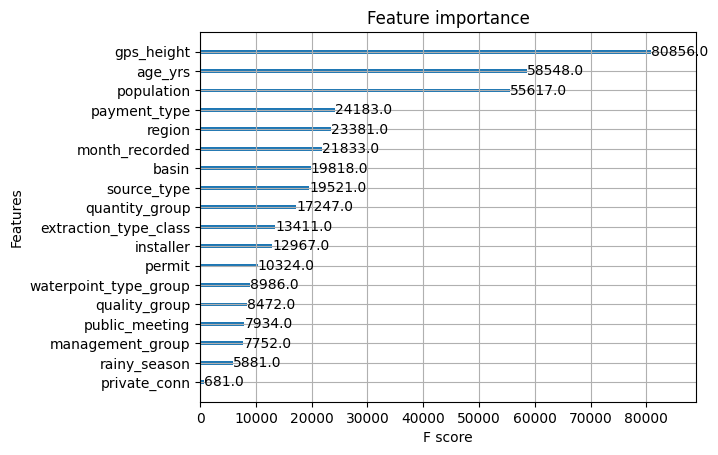

In [68]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [11]:
from hyperopt import STATUS_OK, fmin, tpe, hp

# Define the hyperparameter space
space = {
    'n_estimators': hp.choice('n_estimators', np.arange(100, 1000, dtype=int)),
    'eta': hp.quniform('eta', 0.001, 0.5, 0.025),
    # # A problem with max_depth casted to float instead of int with
    # # the hp.quniform method.
    'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
    'reg_alpha': hp.quniform('reg_alpha', 0, 10, 0.001),
    'reg_lambda': hp.quniform('reg_lambda', 0, 10, 0.001),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
}

# Define the objective function to minimize
def objective(params):
    xgb_model = XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print(f'Best set of hyperparameters:\n{best_params}')

100%|██████████| 100/100 [07:09<00:00,  4.29s/trial, best loss: -0.7905162738496072]
Best set of hyperparameters:
{'colsample_bytree': 1.0, 'eta': 0.275, 'gamma': 0.6000000000000001, 'max_depth': 9, 'min_child_weight': 5.0, 'n_estimators': 84, 'reg_alpha': 0.876, 'reg_lambda': 7.2700000000000005, 'subsample': 0.55}
